In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = "/content/real_estate_prices_dataset.csv"  # Adjust the path as necessary
df = pd.read_csv(path)


In [2]:
# Handle categorical variables (Location, HouseType, Garage, Garden, Basement)
df = pd.get_dummies(df, columns=['Location', 'HouseType', 'Garage', 'Garden', 'Basement'], drop_first=True)

# Define feature set (X) and target variable (y)
X = df.drop(['HouseID', 'Price'], axis=1)  # Dropping HouseID and Price
y = df['Price']  # Target variable

In [3]:
#Define feature set (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [4]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
# Evaluation of Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2): {r2_lr}")

Linear Regression Performance:
Mean Absolute Error (MAE): 241233.2758477184
Mean Squared Error (MSE): 77152763405.36516
R-squared (R2): -0.00018926734001056822


In [6]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation of Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")



Random Forest Performance:
Mean Absolute Error (MAE): 243411.5756208
Mean Squared Error (MSE): 79587676479.89688
R-squared (R2): -0.03175487583619496


In [7]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation of Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2): {r2_gb}")



Gradient Boosting Performance:
Mean Absolute Error (MAE): 242741.8768522135
Mean Squared Error (MSE): 78685006833.07379
R-squared (R2): -0.020052890672520807


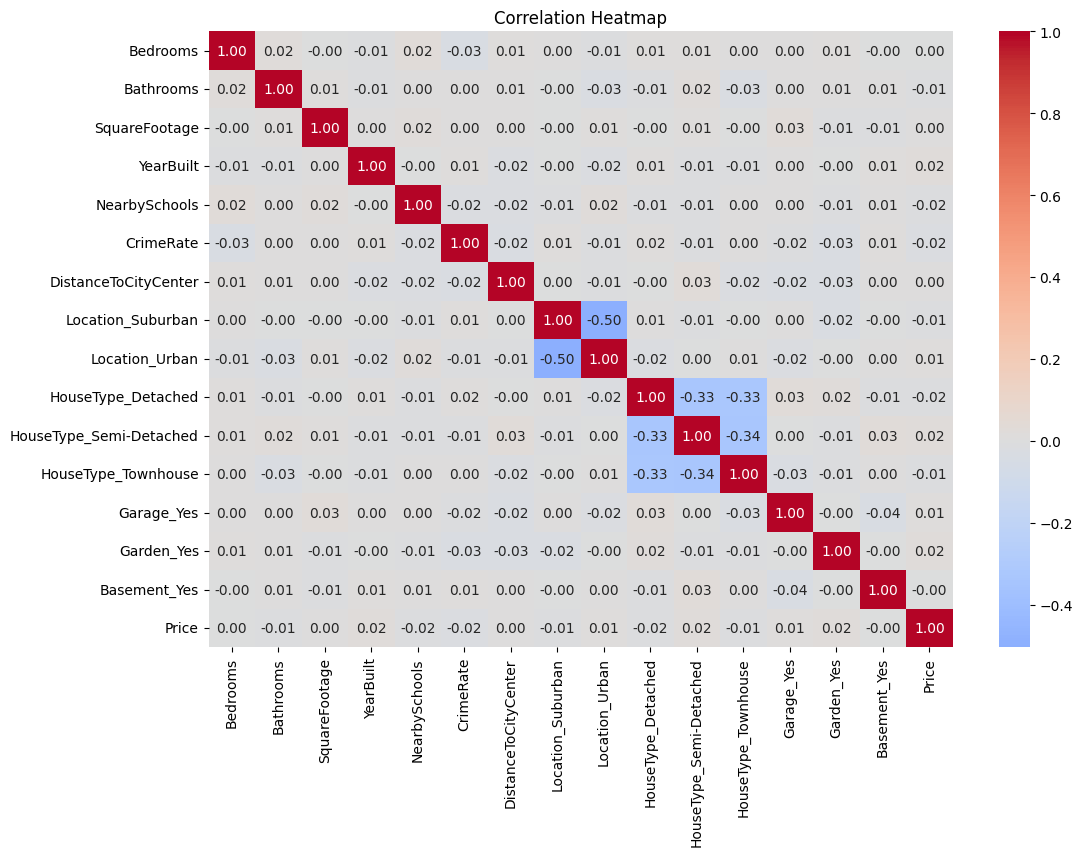

In [8]:
#Correlation heatmap
corr_df = pd.concat([X_train, y_train], axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

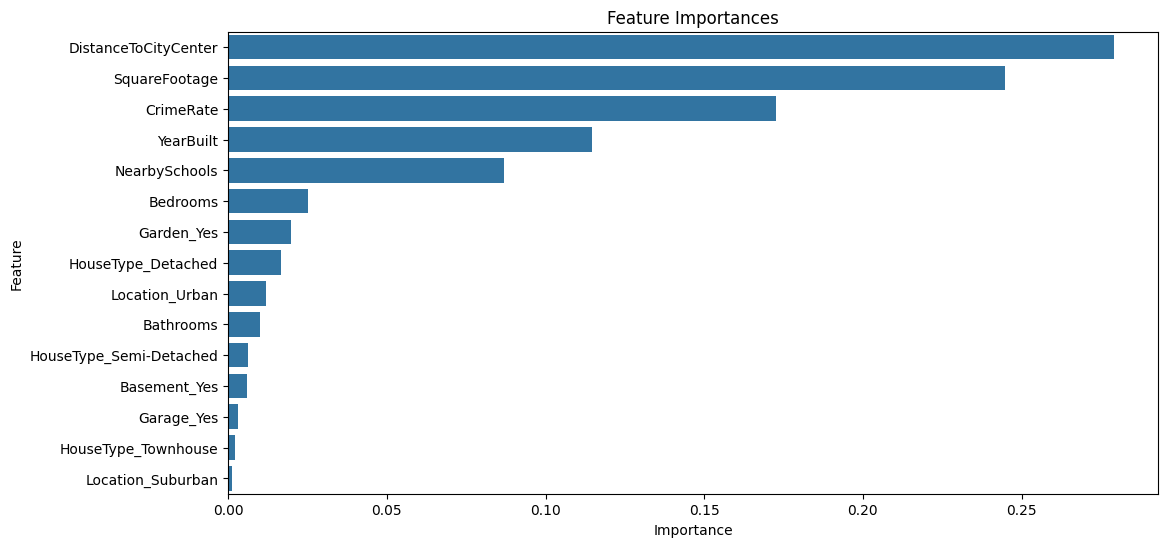

In [11]:
# Feature Importances (for Gradient Boosting)
importances = gb_model.feature_importances_
# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

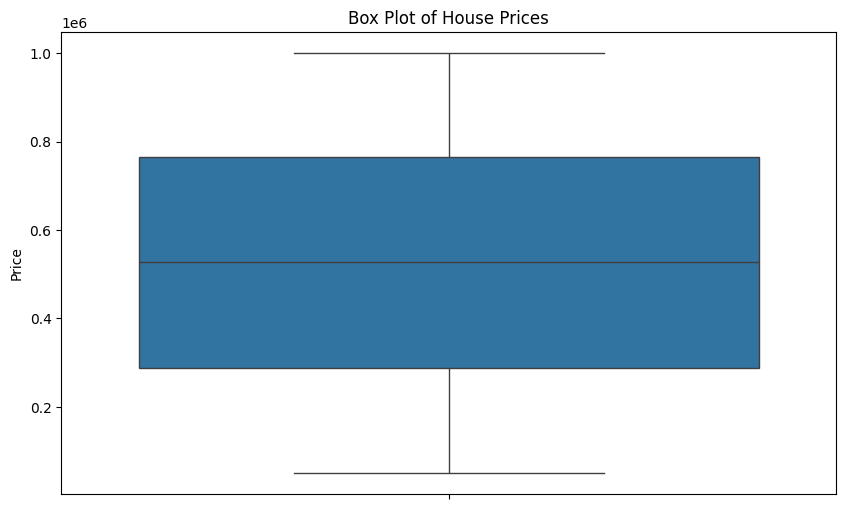

In [12]:
#Boxplot for the target variable (Price)
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train)
plt.title('Box Plot of House Prices')
plt.ylabel('Price')
plt.show()